In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
salary_data = pd.read_csv('Salary_dataset.csv')
salary_data.drop("Unnamed: 0", axis = 1, inplace = True)

salary_data

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


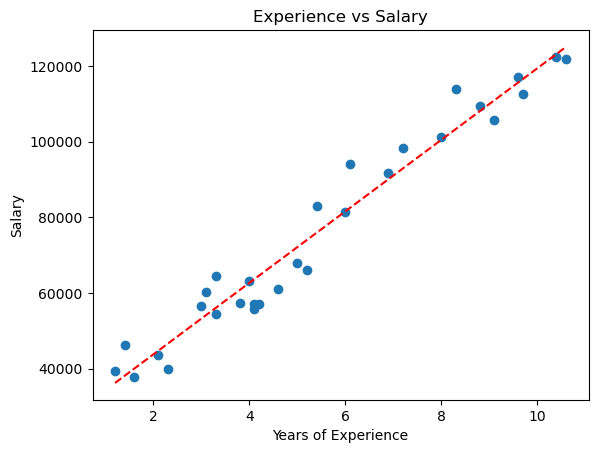

In [34]:
#Scatterplot to visualize the data
z = np.polyfit(salary_data['YearsExperience'], salary_data['Salary'], 1)
p = np.poly1d(z)
plt.scatter(salary_data['YearsExperience'], salary_data['Salary'])
plt.plot(salary_data['YearsExperience'],p(salary_data['YearsExperience']),"r--")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.show()
# or 
# sns.scatterplot(data = salary_data, x = 'YearsExperience', y = 'Salary')
# plt.show()

In [35]:
#Correlation between YearsExperience and Salary
correlation = salary_data['YearsExperience'].corr(salary_data['Salary'])
print(f'Correlation between Years of Experience and Salary: {correlation}')

#Covariance between YearsExperience and Salary
covariance = salary_data['YearsExperience'].cov(salary_data['Salary'])
print(f'Covariance between Years of Experience and Salary: {covariance}')

Correlation between Years of Experience and Salary: 0.9782416184887599
Covariance between Years of Experience and Salary: 76106.30344827585


## Interpretation of Covariance and Correlation found Above :

### Correlation (0.98):
This value is very close to 1, indicating a strong positive linear relationship between Years of Experience and Salary. As experience increases, salary tends to increase as well.

### Covariance (76106.30):
The positive covariance shows that both variables move together (when experience increases, salary increases). The large value reflects the scale of our data, but does not indicate strength like correlation does.

In [ ]:
#Your code for each step goes below

#Step 1: Select the x and y variables
X = salary_data[['YearsExperience']]
y = salary_data['Salary']   

#Step 2: Split the data into training and test sets
#use a random state of 42 when splitting the data so we get consistent results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Step 3: Create a linear regression model
model = LinearRegression()
    
#Step 4: Fit the model
model.fit(X_train, y_train)

#Step 5: Test the model
y_train_pred = model.predict(X_train)
#Predicting the Test set results
y_test_pred = model.predict(X_test)
#Print the predictions
print("Predicted salaries:", y_test_pred)
#Print the actual values
print("Actual salaries:", y_test.values)


Predicted salaries: [115791.21011287  71499.27809463 102597.86866063  75268.80422384
  55478.79204548  60190.69970699]
Actual salaries: [112636.  67939. 113813.  83089.  64446.  57190.]


In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
train_rme=mean_squared_error(y_train,y_train_pred)
test_rme=mean_squared_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)
print(f"train_rme: {train_rme}\n"
      f"test_rme: {test_rme}\n"
      f"train_r2: {train_r2}\n"
      f"test_r2: {test_r2}")

train_rme: 27102249.731261354
test_rme: 49830096.855908334
train_r2: 0.9645401573418148
test_r2: 0.9024461774180498


Text(0.5, 1.0, 'Salary Distribution')

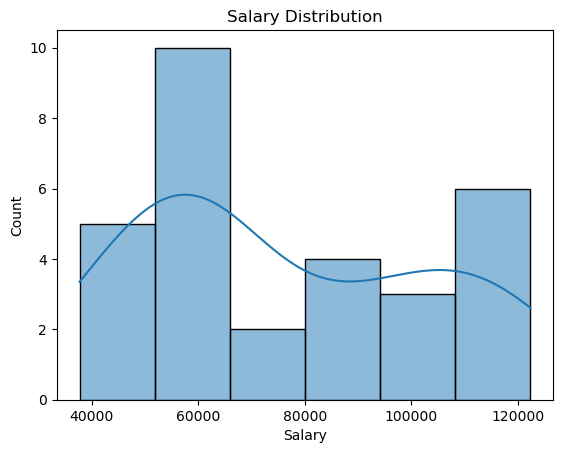

In [37]:
# Does salary follows  normal distribution?
sns.histplot(salary_data['Salary'], kde=True)
plt.title('Salary Distribution')

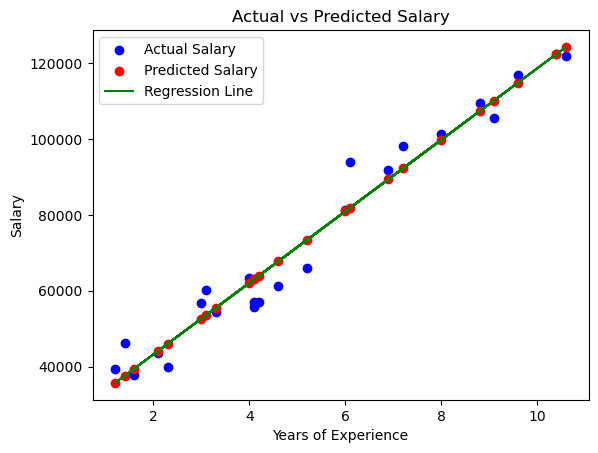

In [ ]:
# Visualize the results for training set
plt.scatter(X_train, y_train, color='blue', label='Actual Salary')
plt.scatter(X_train, y_train_pred, color='red', label='Predicted Salary')
plt.plot(X_train, y_train_pred, color='green', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()

Mean Absolute Error: 6286.453830757745
Mean Squared Error: 49830096.855908334
R^2 Score: 0.9024461774180498


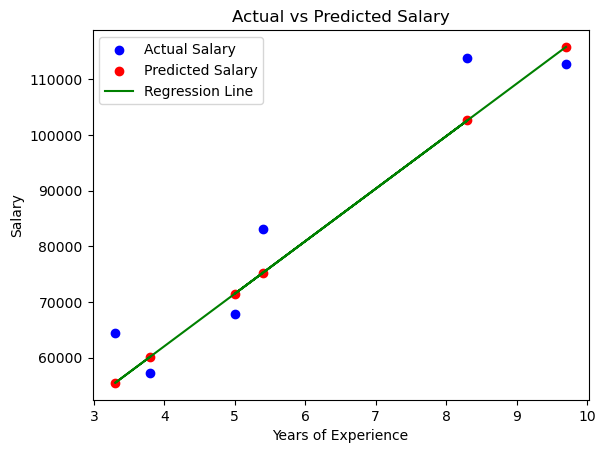

In [ ]:
#Step 6: Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

#Step 7: Visualize the results for test set
plt.scatter(X_test, y_test, color='blue', label='Actual Salary')
plt.scatter(X_test, y_test_pred, color='red', label='Predicted Salary')
plt.plot(X_test, y_test_pred, color='green', label='Regression Line')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Actual vs Predicted Salary')
plt.legend()
plt.show()